# import

In [1]:
import pandas as pd  # データ分析ライブラリ
import numpy as np  # 数値計算ライブラリ
import scipy as sp  # 統計計算ライブラリ
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image #画像ファイル読み書き
import os
import sys
import glob

# あるディレクトリの中の条件を満たすCSVを開いて特定の操作をする

In [2]:
indir="./csv"
csvlist=glob.glob(f"{indir}/flight*OFF*.csv")   
#要素1。f文字列だと変数と文字列のフォーマット文字列が簡単
#要素2。globだとワイルドカードで指定できる

for path in csvlist: #要素3。シェルスクリプトとほぼ同じ書き方   
    filename=os.path.basename(path) #要素４。import osが必要
    
    df=pd.read_csv(path) #要素５
    
    #あとはdfで具体的な操作。以下はファイル名と行数を表示する例
    print(f"{filename}:DF行数={len(df)}")


flightdata-20181215-1046-OFF-1.csv:DF行数=351
flightdata-20181215-1046-OFF-2.csv:DF行数=413


## データフレームの操作をする

## １列に積み上がったデータファイルから、メッシュプロットを作成する

In [3]:
#読み込み
csvname="./csv/testdata1.csv"
df = pd.read_csv(csvname)
df

,all,ave,var,pres,name
0,0.385868,0.00603,0.00696,980,noact
1,0.392690,0.00614,0.00654,981,noact
2,0.376280,0.00588,0.00597,982,noact
3,0.350059,0.00547,0.00520,983,noact
4,0.346682,0.00542,0.00520,984,noact
5,0.300008,0.00469,0.00643,985,noact
6,0.287363,0.00449,0.00618,986,noact
7,0.317670,0.00496,0.00461,987,noact
8,0.304122,0.00475,0.00436,988,noact
9,0.292975,0.00458,0.00413,989,noact


In [4]:
#各presの条件で、noact という行に入っている値を基準にして、差分を出したい
for pres in range(980,991):
    baseave=df.loc[(df["pres"] == pres) & (df["name"] == "noact"), "ave"].reset_index(drop=True)[0]
    #ちょっとトリッキーなことをしている
    #1)df.loc[(df["pres"] == pres) & (df["name"] == "noact"), "ave"]までで値を抽出できるが、変数ではなくSeries型になっている
    #2)しかもそのSeriesのindex番号がDFのものを使っていて、一定ではない
    #3)なので、出てきたSeriesに.reset_indexして0番にして、その0番を指定する、という方法をとった。

    #上記と同じく、条件を満たす行の、特定の列を指定する方法をフル活用
    df.loc[(df['pres'] == pres), 'diff_ave'] = df.loc[(df['pres'] == pres), 'ave'] - baseave #差分
    df.loc[(df['pres'] == pres), 'normalized_diff_ave'] = df.loc[(df['pres'] == pres), 'diff_ave'] / baseave #正規化差分
df

,all,ave,var,pres,name,diff_ave,normalized_diff_ave
0,0.385868,0.00603,0.00696,980,noact,0.00000,0.000000
1,0.392690,0.00614,0.00654,981,noact,0.00000,0.000000
2,0.376280,0.00588,0.00597,982,noact,0.00000,0.000000
3,0.350059,0.00547,0.00520,983,noact,0.00000,0.000000
4,0.346682,0.00542,0.00520,984,noact,0.00000,0.000000
5,0.300008,0.00469,0.00643,985,noact,0.00000,0.000000
6,0.287363,0.00449,0.00618,986,noact,0.00000,0.000000
7,0.317670,0.00496,0.00461,987,noact,0.00000,0.000000
8,0.304122,0.00475,0.00436,988,noact,0.00000,0.000000
9,0.292975,0.00458,0.00413,989,noact,0.00000,0.000000


In [5]:
#名前のリストを作る。今回の場合980のものだけ取り出す、ということをすればリストになる
#そのままだと順番にならないので、sort_valuesをつけることで達成
#その上でindexを変えれば完璧
namelist=df.loc[(df["pres"] == 980), "name"].reset_index(drop=True).sort_values().reset_index(drop=True)
namelist


0                 noact
1      pos1-coflow-cont
2        pos1-coflow-f1
3        pos1-coflow-f6
4     pos1-counter-cont
5       pos1-counter-f1
6       pos1-counter-f6
7      pos2-coflow-cont
8        pos2-coflow-f1
9        pos2-coflow-f6
10    pos2-counter-cont
11      pos2-counter-f1
12      pos2-counter-f6
13     pos3-coflow-cont
14       pos3-coflow-f1
15       pos3-coflow-f6
16    pos3-counter-cont
17      pos3-counter-f1
18      pos3-counter-f6
19     pos4-coflow-cont
20       pos4-coflow-f1
21       pos4-coflow-f6
22    pos4-counter-cont
23      pos4-counter-f1
24      pos4-counter-f6
25    pos5-counter-cont
26      pos5-counter-f1
27      pos5-counter-f6
Name: name, dtype: object

In [6]:
#namelistのインデックスで名前を付け替える
convdf = df
for i in np.arange(0,len(namelist),1):
    convdf=convdf.replace({namelist[i]:i})

#presを1000で割って実際の単位系にする    
convdf["pres"]=convdf["pres"]/1000
convdf

,all,ave,var,pres,name,diff_ave,normalized_diff_ave
0,0.385868,0.00603,0.00696,0.980,0,0.00000,0.000000
1,0.392690,0.00614,0.00654,0.981,0,0.00000,0.000000
2,0.376280,0.00588,0.00597,0.982,0,0.00000,0.000000
3,0.350059,0.00547,0.00520,0.983,0,0.00000,0.000000
4,0.346682,0.00542,0.00520,0.984,0,0.00000,0.000000
5,0.300008,0.00469,0.00643,0.985,0,0.00000,0.000000
6,0.287363,0.00449,0.00618,0.986,0,0.00000,0.000000
7,0.317670,0.00496,0.00461,0.987,0,0.00000,0.000000
8,0.304122,0.00475,0.00436,0.988,0,0.00000,0.000000
9,0.292975,0.00458,0.00413,0.989,0,0.00000,0.000000


In [7]:
#pd.pivot_tableを使って行列形式に変換
meshdf=pd.pivot_table(convdf,
                     values="normalized_diff_ave",
                     columns="name",
                     index="pres") #各項目が今回は1個しかないことを知っているので、aggfuncは特に指定しない

meshdf

name,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
pres,,,,,,,,,,,,,,,,,,,,,
0.980,0.0,0.016584,0.011609,0.036484,0.049751,0.036484,0.044776,0.054726,0.033167,0.048093,...,0.041459,0.024876,0.051410,0.064677,0.034826,0.029851,0.061360,-0.227197,0.023217,0.024876
0.981,0.0,-0.004886,0.000000,-0.021173,0.000000,-0.004886,0.000000,0.034202,0.000000,0.001629,...,0.013029,0.009772,0.009772,0.009772,0.006515,0.011401,-0.009772,-0.001629,0.000000,-0.030945
0.982,0.0,-0.010204,-0.244898,-0.010204,0.003401,0.010204,0.020408,0.001701,NaN,0.027211,...,0.023810,0.008503,0.013605,-0.011905,0.022109,-0.006803,0.000000,-0.039116,-0.013605,0.006803
0.983,0.0,0.034735,0.054845,0.082267,0.045704,0.067642,0.043876,0.020110,0.063985,-0.014625,...,0.018282,0.045704,0.029250,0.060329,0.062157,0.042048,0.060329,0.056673,0.049360,0.056673
0.984,0.0,-0.001845,0.044280,0.009225,0.009225,0.047970,0.040590,0.016605,-0.011070,0.031365,...,0.029520,0.001845,-0.009225,0.012915,0.033210,0.014760,-0.009225,-0.097786,0.005535,0.044280
0.985,0.0,0.004264,-0.023454,-0.021322,0.113006,-0.061834,-0.023454,0.170576,-0.042644,0.010661,...,-0.019190,-0.025586,-0.014925,-0.031983,-0.025586,-0.019190,-0.017058,-0.025586,-0.025586,-0.025586
0.986,0.0,0.008909,-0.011136,-0.015590,0.160356,-0.035635,-0.026726,0.209354,0.046771,-0.026726,...,-0.020045,-0.017817,-0.024499,-0.022272,-0.022272,-0.022272,-0.022272,-0.024499,-0.015590,-0.022272
0.987,0.0,-0.008065,0.040323,-0.187500,0.068548,0.016129,0.028226,0.058468,0.044355,0.034274,...,0.006048,-0.034274,0.036290,-0.122984,-0.074597,0.022177,-0.088710,-0.006048,0.032258,0.038306
0.988,0.0,0.006316,0.048421,0.021053,0.069474,0.061053,0.046316,0.050526,0.006316,0.002105,...,0.027368,0.025263,0.025263,0.048421,0.027368,0.029474,-0.004211,0.027368,0.033684,0.054737


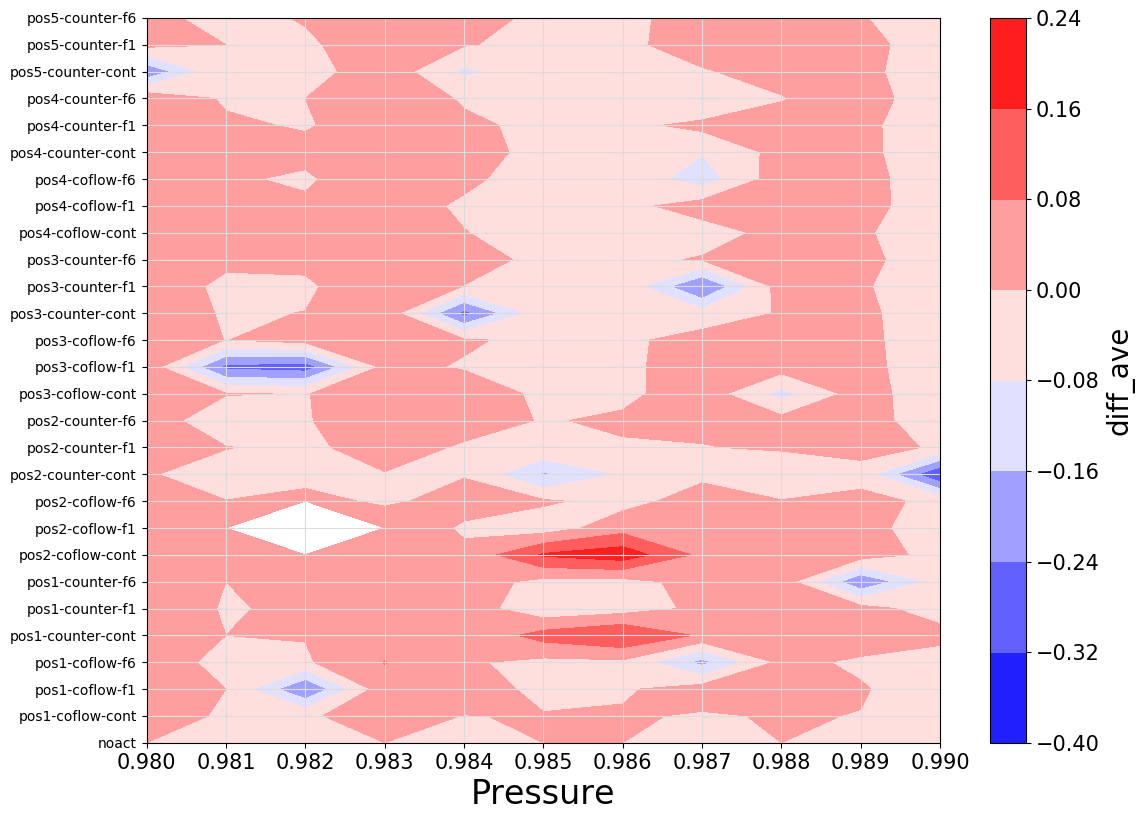

In [8]:
#せっかくなのでプロットしてみる。class Plotsは下にあるものを再利用している。順番的にここに置かないといけなかった・・・
class Plots:
    def figinit(self,wpix=1280,hpix=960): #デフォルトでは1280x960 のdpi100で作成する。ピクセル数は外から変更可能
        self.fig = plt.figure(figsize=(wpix/100, hpix/100), dpi=100,
                     facecolor='w', linewidth=0, edgecolor='w')
        self.ax = self.fig.add_subplot(1,1,1)
    
    def figout(self,savename): #保存名を指定できる
        self.fig.savefig(savename)
        plt.show()                
       
        

#プロット用のインスタンス。常に「プロット準備」「中身の設定」「出力」を一直線に行うので、複数のインスタンスを用意しなくていい
plot=Plots()

plot.figinit() #プロットの初期化。必ず最初に書く
mappable=plot.ax.contourf(meshdf.index,meshdf.columns,meshdf.T,cmap='bwr') #カラーマップを指定しながらプロット。mappableはおまじないと思おう

plot.ax.set_xlabel("Pressure", fontsize=24) #X軸の名前設定
plot.ax.grid(color='gainsboro') #X、Y両方のグリッドを色指定しながら表示する。
plot.ax.set_xticks(np.arange(0.980, 0.990, 0.001)) #stepの半分から始めることで、それぞれの帯の半分の位置にメモリを配置する
plot.ax.set_yticks(np.arange(0, len(namelist), 1)) #stepの半分から始めることで、それぞれの帯の半分の位置にメモリを配置する
plot.ax.set_yticklabels(namelist) #メモリをリストの文字列に置き換える
plot.ax.tick_params(axis='y',labelsize=10) #メモリのフォントサイ
plot.ax.tick_params(axis='x',labelsize=15) #メモリのフォントサイ

#カラーバー設定
pp=plt.colorbar(mappable,ax=plot.ax,orientation="vertical")#,ticks=np.arange(0,1.1, 0.2)) 
# pp.set_clim(0.1,0.9) #カラーマップの最大値と最小値に対応する値を設定
pp.set_label("diff_ave" ,fontsize=20) #カラーバーのラベル設定
pp.ax.tick_params(labelsize=15) #カラーバーのメモリフォントサイズ

plt.show()

## 既に行列っぽいデータフレームを加工する

In [16]:
#読み込み
csvname="./csv/testdata2.csv"
df = pd.read_csv(csvname)
df

,Span,Chord,92-L-off,92-L-8-1,92-L-8-6,92-L-10-1,92-L-10-6,92-L-off2,92-M-off,92-M-8-1,...,40-M-8-6,40-M-10-1,40-M-10-6,40-M-off2,40-H-off,40-H-8-1,40-H-8-6,40-H-10-1,40-H-10-6,40-H-off2
0,50.0,7.5,-1.451586,-1.453355,-1.456819,-1.478679,-1.471493,-1.481816,-2.343809,-2.333167,...,-2.364838,-2.352873,-2.358691,-2.361020,-0.466442,-0.485517,-0.465022,-0.493173,-0.479118,-0.481166
1,50.0,10.0,-1.403297,-1.405313,-1.408802,-1.429507,-1.423940,-1.432380,-2.141685,-2.133912,...,-2.163280,-2.153122,-2.158357,-2.160032,-0.468452,-0.488616,-0.467814,-0.497160,-0.483274,-0.483451
2,50.0,12.5,-1.397949,-1.400728,-1.402989,-1.425322,-1.419587,-1.428380,-1.993618,-1.988871,...,-2.016377,-2.005680,-2.010529,-2.012810,-0.471651,-0.494750,-0.472871,-0.502924,-0.488574,-0.488184
3,50.0,15.0,-1.326353,-1.329268,-1.331437,-1.352162,-1.346925,-1.355189,-1.888987,-1.879836,...,-1.905800,-1.895054,-1.901018,-1.901917,-0.481817,-0.504613,-0.482437,-0.513328,-0.498317,-0.498233
4,50.0,17.5,-1.231586,-1.232812,-1.235143,-1.254288,-1.250065,-1.258268,-1.831701,-1.819201,...,-1.843224,-1.834095,-1.840413,-1.841051,-0.480910,-0.505512,-0.482662,-0.512243,-0.498688,-0.498158
5,50.0,20.0,-1.166462,-1.166217,-1.170368,-1.187037,-1.182616,-1.189774,-1.825630,-1.809170,...,-1.832387,-1.824056,-1.828487,-1.827691,-0.493435,-0.518038,-0.495315,-0.521435,-0.511199,-0.510538
6,50.0,25.0,-1.033684,-1.031307,-1.036947,-1.050317,-1.045760,-1.053839,-1.531120,-1.510905,...,-1.591927,-1.587032,-1.581939,-1.591158,-0.475964,-0.498017,-0.477968,-0.503747,-0.491317,-0.488665
7,50.0,30.0,-0.965348,-0.962919,-0.967283,-0.978677,-0.973870,-0.983151,-0.973448,-0.971915,...,-0.981242,-0.978189,-0.980873,-0.979260,-0.472955,-0.496669,-0.478390,-0.504777,-0.493054,-0.486582
8,50.0,40.0,-0.666246,-0.665577,-0.664915,-0.674684,-0.669751,-0.679764,-0.807974,-0.804239,...,-0.818508,-0.815589,-0.817161,-0.816436,-0.467383,-0.496357,-0.477086,-0.501765,-0.497902,-0.484121
9,50.0,50.0,-0.487358,-0.487265,-0.486531,-0.493999,-0.492534,-0.497644,-0.592071,-0.589760,...,-0.600628,-0.599503,-0.599773,-0.600118,-0.466517,-0.497965,-0.477816,-0.503747,-0.502278,-0.482495


In [22]:
#必要なデータだけが入ったデータフレームをそれぞれ作る
span50data = df[df['Span']==50].reset_index(drop=True)

#Chordの後ろの方の並び方を変更したい。無理やりやる。くっつけて落とす。tmpを使っているのは変数名を短くしたいから
tmp=span50data
tmp=tmp.append(tmp.loc[11])
tmp=tmp.append(tmp.loc[10])
tmp=tmp.reset_index(drop=True)
tmp=tmp.drop(10)
tmp=tmp.drop(11)
tmp=tmp.reset_index(drop=True)
span50data=tmp
span50data

,Span,Chord,92-L-off,92-L-8-1,92-L-8-6,92-L-10-1,92-L-10-6,92-L-off2,92-M-off,92-M-8-1,...,40-M-8-6,40-M-10-1,40-M-10-6,40-M-off2,40-H-off,40-H-8-1,40-H-8-6,40-H-10-1,40-H-10-6,40-H-off2
0,50.0,7.5,-1.451586,-1.453355,-1.456819,-1.478679,-1.471493,-1.481816,-2.343809,-2.333167,...,-2.364838,-2.352873,-2.358691,-2.361020,-0.466442,-0.485517,-0.465022,-0.493173,-0.479118,-0.481166
1,50.0,10.0,-1.403297,-1.405313,-1.408802,-1.429507,-1.423940,-1.432380,-2.141685,-2.133912,...,-2.163280,-2.153122,-2.158357,-2.160032,-0.468452,-0.488616,-0.467814,-0.497160,-0.483274,-0.483451
2,50.0,12.5,-1.397949,-1.400728,-1.402989,-1.425322,-1.419587,-1.428380,-1.993618,-1.988871,...,-2.016377,-2.005680,-2.010529,-2.012810,-0.471651,-0.494750,-0.472871,-0.502924,-0.488574,-0.488184
3,50.0,15.0,-1.326353,-1.329268,-1.331437,-1.352162,-1.346925,-1.355189,-1.888987,-1.879836,...,-1.905800,-1.895054,-1.901018,-1.901917,-0.481817,-0.504613,-0.482437,-0.513328,-0.498317,-0.498233
4,50.0,17.5,-1.231586,-1.232812,-1.235143,-1.254288,-1.250065,-1.258268,-1.831701,-1.819201,...,-1.843224,-1.834095,-1.840413,-1.841051,-0.480910,-0.505512,-0.482662,-0.512243,-0.498688,-0.498158
5,50.0,20.0,-1.166462,-1.166217,-1.170368,-1.187037,-1.182616,-1.189774,-1.825630,-1.809170,...,-1.832387,-1.824056,-1.828487,-1.827691,-0.493435,-0.518038,-0.495315,-0.521435,-0.511199,-0.510538
6,50.0,25.0,-1.033684,-1.031307,-1.036947,-1.050317,-1.045760,-1.053839,-1.531120,-1.510905,...,-1.591927,-1.587032,-1.581939,-1.591158,-0.475964,-0.498017,-0.477968,-0.503747,-0.491317,-0.488665
7,50.0,30.0,-0.965348,-0.962919,-0.967283,-0.978677,-0.973870,-0.983151,-0.973448,-0.971915,...,-0.981242,-0.978189,-0.980873,-0.979260,-0.472955,-0.496669,-0.478390,-0.504777,-0.493054,-0.486582
8,50.0,40.0,-0.666246,-0.665577,-0.664915,-0.674684,-0.669751,-0.679764,-0.807974,-0.804239,...,-0.818508,-0.815589,-0.817161,-0.816436,-0.467383,-0.496357,-0.477086,-0.501765,-0.497902,-0.484121
9,50.0,50.0,-0.487358,-0.487265,-0.486531,-0.493999,-0.492534,-0.497644,-0.592071,-0.589760,...,-0.600628,-0.599503,-0.599773,-0.600118,-0.466517,-0.497965,-0.477816,-0.503747,-0.502278,-0.482495


In [30]:
#Chordの列及び"H-10-1"を満たす列だけ取得。縦棒が決め手　https://qiita.com/irs/items/4ebbfd8bef63db1892fb
extdata=span50data.loc[:,span50data.columns.str.contains("Chord|H-10-1")]
extdata

,Chord,92-H-10-1,90-H-10-1,875-H-10-1,85-H-10-1,825-H-10-1,80-H-10-1,75-H-10-1,70-H-10-1,65-H-10-1,60-H-10-1,50-H-10-1,40-H-10-1
0,7.5,-2.673302,-2.656980,-2.675580,-2.912233,-2.700246,-1.915088,-1.644496,-1.290649,-1.032921,-1.042979,-0.546911,-0.493173
1,10.0,-2.637534,-2.621930,-2.636623,-2.868081,-2.663194,-1.890554,-1.635745,-1.292403,-1.042352,-1.059047,-0.554847,-0.497160
2,12.5,-2.518472,-2.500487,-2.527035,-2.751781,-2.552649,-1.836568,-1.563287,-1.236137,-1.019640,-1.061747,-0.557601,-0.502924
3,15.0,-2.370713,-2.358356,-2.412900,-2.643562,-2.410036,-1.703537,-1.462956,-1.185082,-0.984784,-1.037798,-0.563845,-0.513328
4,17.5,-1.952128,-1.930023,-1.944089,-2.104852,-2.014027,-1.501685,-1.348051,-1.125960,-0.947198,-0.988293,-0.555226,-0.512243
5,20.0,-1.445247,-1.439283,-1.448555,-1.546959,-1.515393,-1.248412,-1.269246,-1.078746,-0.937301,-0.952833,-0.556158,-0.521435
6,25.0,-1.189273,-1.183289,-1.196144,-1.273456,-1.205916,-1.006170,-1.107415,-0.963641,-0.875041,-0.884244,-0.535872,-0.503747
7,30.0,-1.034356,-1.027647,-1.037943,-1.101274,-1.042408,-0.907763,-1.003976,-0.875706,-0.828533,-0.855787,-0.536804,-0.504777
8,40.0,-0.740531,-0.736162,-0.764764,-0.794530,-0.765732,-0.743259,-0.846561,-0.757061,-0.735998,-0.766655,-0.535312,-0.501765
9,50.0,-0.522921,-0.520374,-0.540040,-0.559509,-0.556767,-0.606183,-0.723641,-0.666175,-0.643160,-0.694203,-0.530713,-0.503747


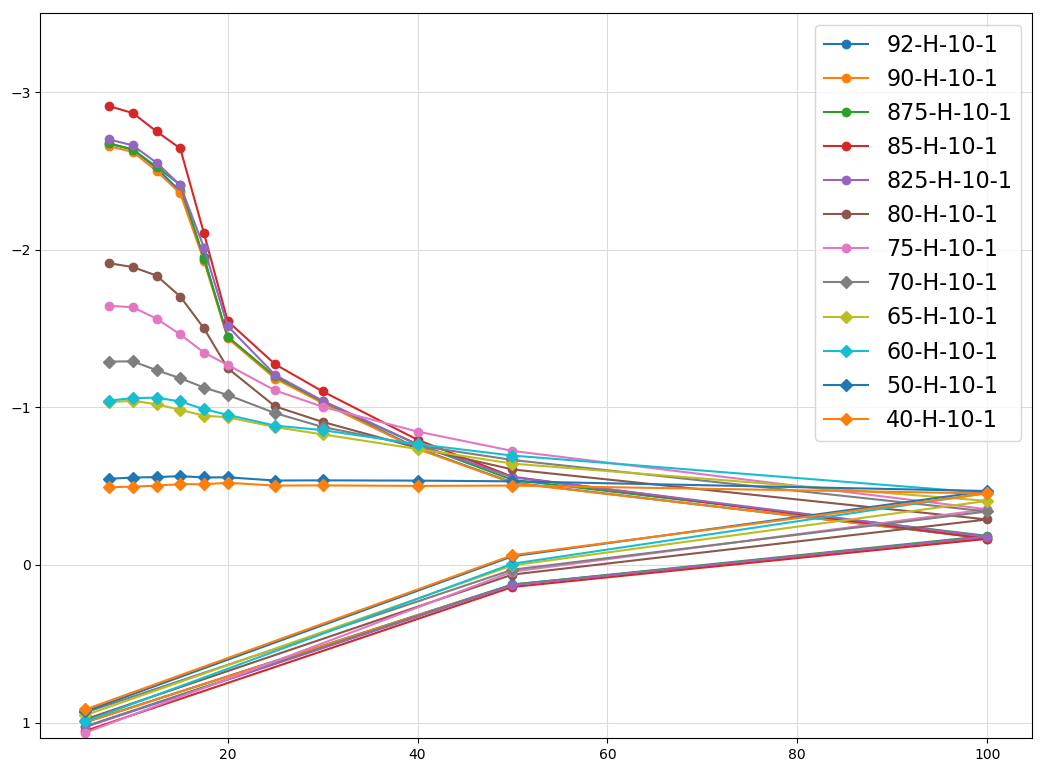

In [42]:
#せっかくなのでプロット。リストとか使ってみる
namelist=extdata.columns[extdata.columns.str.contains("H-10-1")] #含む行名だけを取得

#プロット用のインスタンス。
plot=Plots()

plot.figinit() #グラフの大きさを指定しつつ初期化
for i,name in enumerate(namelist): #配列のインデックスも同時に取得する書き方　https://uxmilk.jp/8680
    if i>len(namelist)/2: #半分でマーカーが変わるようにしてみる
        mark="D"
    else:
        mark="o"
    
    plot.ax.plot("Chord", name, data=extdata, label=name,marker=mark) #プロット対象の設定＋ラベル設定＋線種設定    

plot.ax.grid(color='gainsboro') #X、Y両方のグリッドを色指定しながら表示する。
plot.ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fontsize=16) #凡例表示の設定
plot.ax.set_ylim([1.1,-3.5])   #Y軸の表示する範囲の調整。逆にすると上下反転できる

plt.show() #表示するだけ

In [24]:
tedata = df[df['Chord']==100].reset_index(drop=True)
#こちらもSpanで並び替えてindexつけかえ
tmp=tedata
tmp=tmp.sort_values('Span').reset_index(drop=True)
tedata=tmp
tedata

,Span,Chord,92-L-off,92-L-8-1,92-L-8-6,92-L-10-1,92-L-10-6,92-L-off2,92-M-off,92-M-8-1,...,40-M-8-6,40-M-10-1,40-M-10-6,40-M-off2,40-H-off,40-H-8-1,40-H-8-6,40-H-10-1,40-H-10-6,40-H-off2
0,10.0,100.0,-0.101243,-0.108969,-0.095329,-0.098989,-0.102801,-0.103072,-0.178895,-0.184617,...,-0.185148,-0.182059,-0.185477,-0.190685,-0.464295,-0.354192,-0.346735,-0.317890,-0.262428,-0.470052
1,30.0,100.0,0.002292,-0.001703,0.004588,0.004888,0.001646,0.003092,0.064187,0.065302,...,0.065754,0.067255,0.059385,0.065712,-0.485985,-0.508538,-0.527938,-0.513342,-0.562471,-0.499845
2,50.0,100.0,0.060641,0.057882,0.061316,0.059828,0.059479,0.054893,0.107472,0.107745,...,0.112277,0.111287,0.105542,0.108102,-0.435307,-0.452348,-0.422053,-0.453892,-0.443593,-0.445092
3,70.0,100.0,0.065114,0.058672,0.066987,0.064470,0.064245,0.058188,0.123807,0.123632,...,0.126694,0.125825,0.121051,0.122362,-0.519824,-0.535918,-0.522321,-0.539997,-0.522642,-0.535037
4,90.0,100.0,0.015739,0.012797,0.016481,0.015255,0.012157,0.012321,0.091883,0.091985,...,0.094237,0.090711,0.087299,0.088642,-0.290228,-0.311526,-0.346194,-0.310084,-0.323722,-0.308404
5,94.0,100.0,0.020567,0.015750,0.021553,0.018871,0.018450,0.016335,0.055486,0.055635,...,0.056059,0.054759,0.050583,0.051728,-0.141165,-0.158240,-0.197133,-0.154565,-0.180072,-0.147218
6,95.5,100.0,0.012457,0.009495,0.014827,0.011942,0.013205,0.010005,0.007789,0.009499,...,0.010155,0.007443,0.004378,0.005576,-0.138775,-0.158915,-0.190265,-0.154675,-0.175589,-0.145490
7,97.0,100.0,-0.039815,-0.043741,-0.040151,-0.041662,-0.041041,-0.044841,-0.060501,-0.058365,...,-0.051612,-0.053090,-0.059203,-0.056428,-0.211487,-0.240273,-0.261903,-0.234852,-0.254498,-0.227409
8,98.5,100.0,-0.115223,-0.118024,-0.115330,-0.117744,-0.115666,-0.120786,-0.229062,-0.226758,...,-0.227446,-0.226183,-0.232730,-0.228853,-0.379012,-0.415393,-0.420554,-0.412215,-0.420740,-0.401303
9,100.0,100.0,-0.182175,-0.185695,-0.182822,-0.187669,-0.182975,-0.189609,-0.305555,-0.303417,...,-0.307833,-0.307418,-0.311543,-0.311339,-0.360979,-0.387995,-0.386453,-0.383953,-0.385540,-0.376464


In [56]:
#Spanの列及び"H-10-1"を満たす列だけ取得。縦棒が決め手　https://qiita.com/irs/items/4ebbfd8bef63db1892fb
extdata=tedata.loc[:,span50data.columns.str.contains("Span|H-10-1")]
extdata

,Span,92-H-10-1,90-H-10-1,875-H-10-1,85-H-10-1,825-H-10-1,80-H-10-1,75-H-10-1,70-H-10-1,65-H-10-1,60-H-10-1,50-H-10-1,40-H-10-1
0,10.0,-0.166401,-0.160249,-0.177816,-0.151860,-0.146786,-0.192179,-0.215645,-0.162381,-0.213582,-0.213281,-0.313970,-0.317890
1,30.0,-0.214726,-0.217079,-0.231881,-0.214680,-0.197207,-0.225361,-0.270551,-0.235333,-0.309289,-0.358776,-0.487811,-0.513342
2,50.0,-0.167691,-0.169923,-0.184735,-0.165960,-0.179812,-0.288740,-0.353540,-0.339426,-0.406702,-0.456642,-0.469436,-0.453892
3,70.0,-0.113893,-0.111853,-0.125897,-0.102248,-0.166835,-0.346437,-0.438682,-0.382039,-0.433765,-0.446553,-0.526313,-0.539997
4,90.0,0.011222,0.001325,0.002992,0.013757,-0.070405,-0.367684,-0.490380,-0.446467,-0.391146,-0.413508,-0.319701,-0.310084
5,94.0,0.024029,0.016616,0.019157,0.025333,-0.065879,-0.317832,-0.407258,-0.345684,-0.279135,-0.282463,-0.171033,-0.154565
6,95.5,-0.018673,-0.025951,-0.024398,-0.020724,-0.111096,-0.342796,-0.401758,-0.334241,-0.274922,-0.276612,-0.167859,-0.154675
7,97.0,-0.137219,-0.140934,-0.143200,-0.145597,-0.226231,-0.411839,-0.453266,-0.381402,-0.338773,-0.346773,-0.246745,-0.234852
8,98.5,-0.358108,-0.360111,-0.366857,-0.382219,-0.423316,-0.511574,-0.553623,-0.475741,-0.466633,-0.491372,-0.420470,-0.412215
9,100.0,-0.330637,-0.331597,-0.340324,-0.348618,-0.375725,-0.460173,-0.510733,-0.438246,-0.426736,-0.443988,-0.386244,-0.383953


In [57]:
#メッシュプロットにしたいので、名前を付け替える
namelist=extdata.columns[extdata.columns.str.contains("H-10-1")] #含む行名だけをリストで取得
for nameorg in namelist:
    name=nameorg.replace('-H-10-1','') #いらない部分を削除
    if len(name)==2: #文字列の桁数で無理やり正しい少数に変換
        val=float(name)/100
    else:
        val=float(name)/1000
    extdata=extdata.rename(columns={nameorg: val}) #列名の書き換え

extdata

,Span,0.92,0.9,0.875,0.85,0.825,0.8,0.75,0.7,0.65,0.6,0.5,0.4
0,10.0,-0.166401,-0.160249,-0.177816,-0.151860,-0.146786,-0.192179,-0.215645,-0.162381,-0.213582,-0.213281,-0.313970,-0.317890
1,30.0,-0.214726,-0.217079,-0.231881,-0.214680,-0.197207,-0.225361,-0.270551,-0.235333,-0.309289,-0.358776,-0.487811,-0.513342
2,50.0,-0.167691,-0.169923,-0.184735,-0.165960,-0.179812,-0.288740,-0.353540,-0.339426,-0.406702,-0.456642,-0.469436,-0.453892
3,70.0,-0.113893,-0.111853,-0.125897,-0.102248,-0.166835,-0.346437,-0.438682,-0.382039,-0.433765,-0.446553,-0.526313,-0.539997
4,90.0,0.011222,0.001325,0.002992,0.013757,-0.070405,-0.367684,-0.490380,-0.446467,-0.391146,-0.413508,-0.319701,-0.310084
5,94.0,0.024029,0.016616,0.019157,0.025333,-0.065879,-0.317832,-0.407258,-0.345684,-0.279135,-0.282463,-0.171033,-0.154565
6,95.5,-0.018673,-0.025951,-0.024398,-0.020724,-0.111096,-0.342796,-0.401758,-0.334241,-0.274922,-0.276612,-0.167859,-0.154675
7,97.0,-0.137219,-0.140934,-0.143200,-0.145597,-0.226231,-0.411839,-0.453266,-0.381402,-0.338773,-0.346773,-0.246745,-0.234852
8,98.5,-0.358108,-0.360111,-0.366857,-0.382219,-0.423316,-0.511574,-0.553623,-0.475741,-0.466633,-0.491372,-0.420470,-0.412215
9,100.0,-0.330637,-0.331597,-0.340324,-0.348618,-0.375725,-0.460173,-0.510733,-0.438246,-0.426736,-0.443988,-0.386244,-0.383953


In [58]:
#メッシュプロット用に、Spanをindexにする
meshdf=extdata #特に意味はない

meshdf.index = meshdf.Span #インデックスを変更。最後にやらないとindexが変わって列のコピーできない。       
meshdf.drop(columns=['Span'], inplace=True)#いらなくなったtimeを消す
meshdf


,0.92,0.9,0.875,0.85,0.825,0.8,0.75,0.7,0.65,0.6,0.5,0.4
Span,,,,,,,,,,,,
10.0,-0.166401,-0.160249,-0.177816,-0.151860,-0.146786,-0.192179,-0.215645,-0.162381,-0.213582,-0.213281,-0.313970,-0.317890
30.0,-0.214726,-0.217079,-0.231881,-0.214680,-0.197207,-0.225361,-0.270551,-0.235333,-0.309289,-0.358776,-0.487811,-0.513342
50.0,-0.167691,-0.169923,-0.184735,-0.165960,-0.179812,-0.288740,-0.353540,-0.339426,-0.406702,-0.456642,-0.469436,-0.453892
70.0,-0.113893,-0.111853,-0.125897,-0.102248,-0.166835,-0.346437,-0.438682,-0.382039,-0.433765,-0.446553,-0.526313,-0.539997
90.0,0.011222,0.001325,0.002992,0.013757,-0.070405,-0.367684,-0.490380,-0.446467,-0.391146,-0.413508,-0.319701,-0.310084
94.0,0.024029,0.016616,0.019157,0.025333,-0.065879,-0.317832,-0.407258,-0.345684,-0.279135,-0.282463,-0.171033,-0.154565
95.5,-0.018673,-0.025951,-0.024398,-0.020724,-0.111096,-0.342796,-0.401758,-0.334241,-0.274922,-0.276612,-0.167859,-0.154675
97.0,-0.137219,-0.140934,-0.143200,-0.145597,-0.226231,-0.411839,-0.453266,-0.381402,-0.338773,-0.346773,-0.246745,-0.234852
98.5,-0.358108,-0.360111,-0.366857,-0.382219,-0.423316,-0.511574,-0.553623,-0.475741,-0.466633,-0.491372,-0.420470,-0.412215


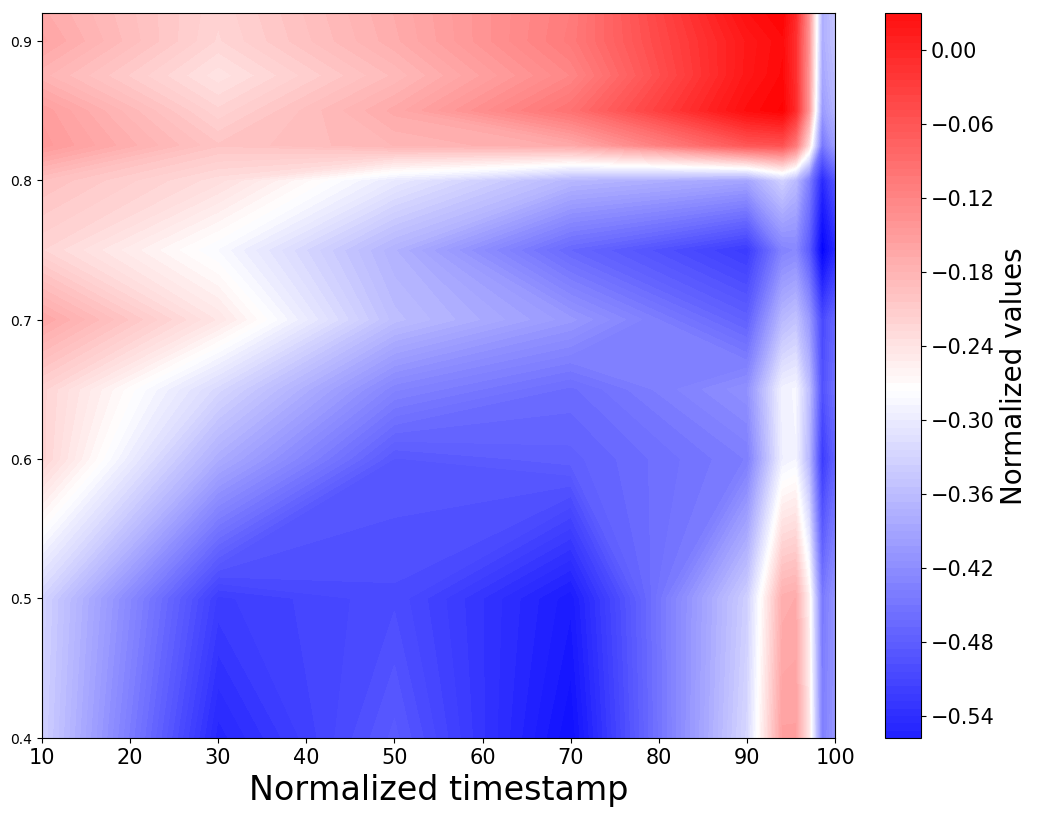

In [67]:
#プロット用のインスタンス。
plot=Plots()

plot.figinit() #プロットの初期化。必ず最初に書く
mappable=plot.ax.contourf(meshdf.index,meshdf.columns,meshdf.T,cmap='bwr',levels=100) #カラーマップを指定しながらプロット。mappableはおまじないと思おう

plot.ax.set_xlabel("Normalized timestamp", fontsize=24) #X軸の名前設定
# plot.ax.set_yticks(np.arange(colinit+colstep/2, colnum, colstep)) #stepの半分から始めることで、それぞれの帯の半分の位置にメモリを配置する
plot.ax.tick_params(axis='y',labelsize=10) #メモリのフォントサイ
plot.ax.tick_params(axis='x',labelsize=15) #メモリのフォントサイ

#カラーバー設定
pp=plt.colorbar(mappable,ax=plot.ax,orientation="vertical")
pp.set_clim(-0.6,0.05) #カラーマップの最大値と最小値に対応する値を設定
pp.set_label("Normalized values" ,fontsize=20) #カラーバーのラベル設定
pp.ax.tick_params(labelsize=15) #カラーバーのメモリフォントサイズ

plt.show() #表示するだけ

## Kmeans法でクラスタリングする

### 数値データでクラスタリングする

### 画像データでクラスタリングする

# 折れ線プロット/メッシュプロット/散布プロットを書く

In [9]:
class Plots:
    def figinit(self,wpix=1280,hpix=960): #デフォルトでは1280x960 のdpi100で作成する。ピクセル数は外から変更可能
        self.fig = plt.figure(figsize=(wpix/100, hpix/100), dpi=100,
                     facecolor='w', linewidth=0, edgecolor='w')
        self.ax = self.fig.add_subplot(1,1,1)
    
    def figout(self,savename): #保存名を指定できる
        self.fig.savefig(savename)
        plt.show()                
        
        

## 折れ線プロット

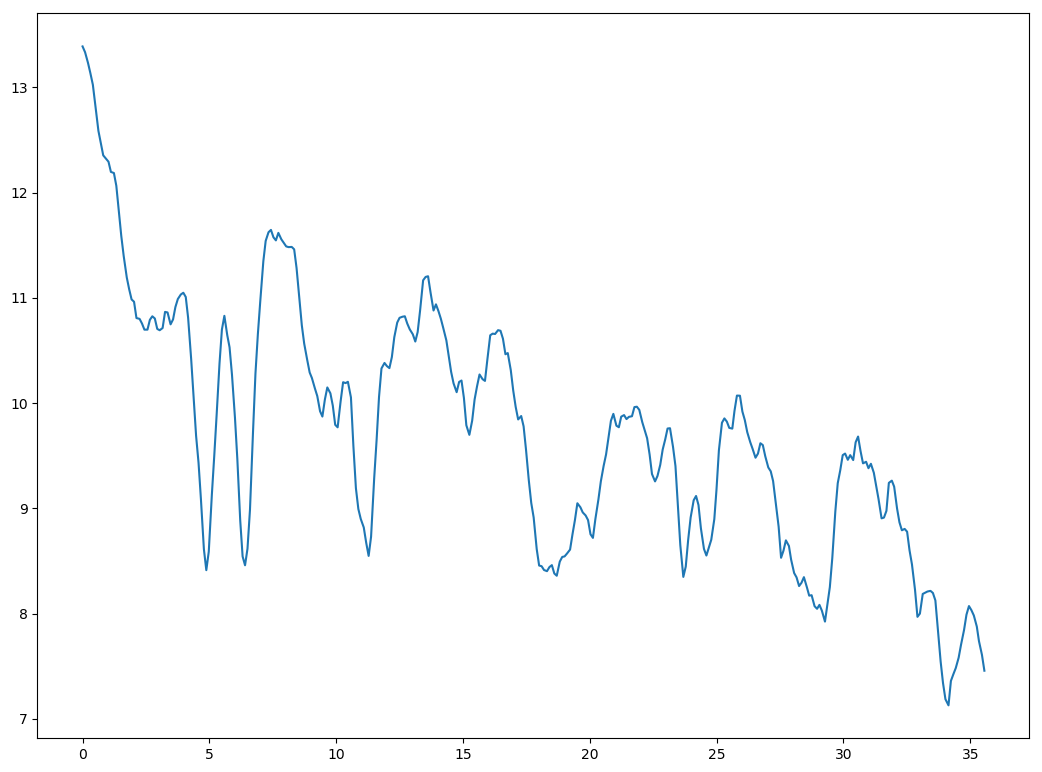

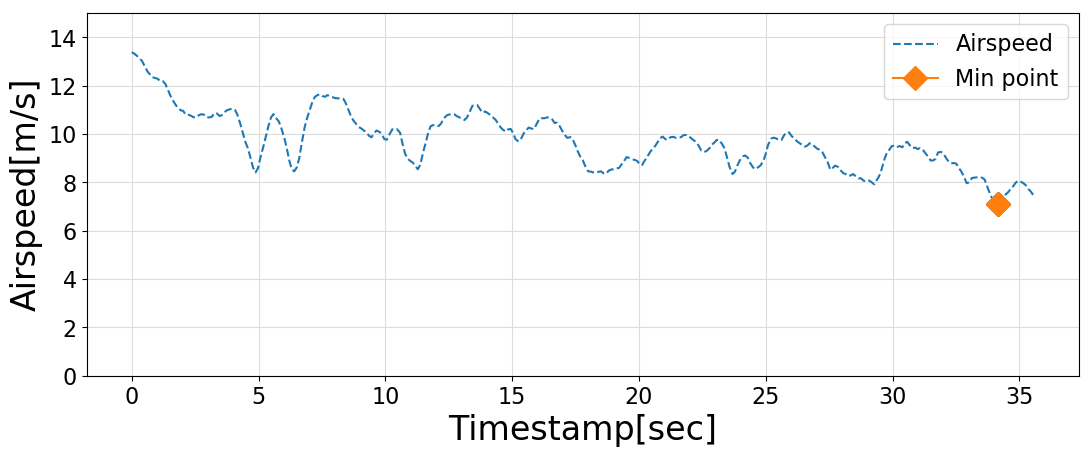

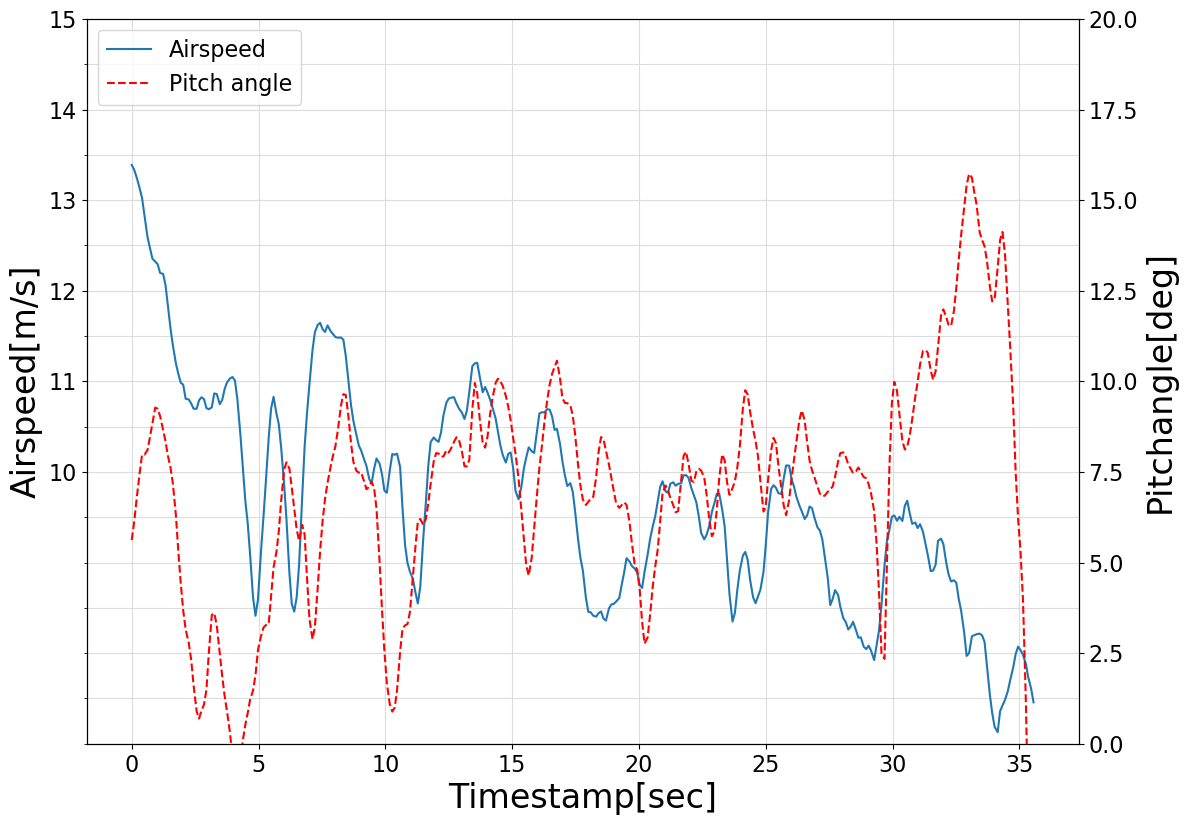

In [10]:
#csvデータ読み込んでデータフレームへ
csvname="./csv/flightdata-20181215-1046-OFF-1.csv"
df = pd.read_csv(csvname)

#結果を出力するディレクトリの生成
dirname="plots"
os.makedirs(f"./{dirname}", exist_ok=True)

#プロット用のインスタンス。常に「プロット準備」「中身の設定」「出力」を一直線に行うので、複数のインスタンスを用意しなくていい
plot=Plots()

#何も設定しない、一番簡単なプロット
plot.figinit() #プロットの初期化。必ず最初に書く
plot.ax.plot("timestamp", "Airspeed[m/s]", data=df) #プロット対象の設定
plot.figout(f"{dirname}/1.png") #プロットの出力。必ず最後に書く


#色々設定してプロット。
df["min_airspeed"] = df["Airspeed[m/s]"].min() #最小値を持つ列を追加
df["min_airspeed_time"] = df.at[df["Airspeed[m/s]"].idxmin(),"timestamp"] #最小値に対応する時間を持つ列を追加

plot.figinit(1280,480) #グラフの大きさを指定しつつ初期化
plot.ax.plot("timestamp", "Airspeed[m/s]", data=df, label="Airspeed",linestyle='dashed') #プロット対象の設定＋ラベル設定＋線種設定
plot.ax.plot("min_airspeed_time", "min_airspeed", data=df, label="Min point", marker="D",markersize=12) #プロット対象の設定＋ラベル設定＋線種設定

plot.ax.grid(color='gainsboro') #X、Y両方のグリッドを色指定しながら表示する。
plot.ax.tick_params(labelsize=16) #メモリのフォントサイズ設定
plot.ax.set_xlabel("Timestamp[sec]", fontsize=24) #X軸の名前設定
plot.ax.set_ylabel("Airspeed[m/s]", fontsize=24) #Y軸の名前設定
plot.ax.legend(bbox_to_anchor=(1, 1), loc='upper right', fontsize=16) #凡例表示の設定
plot.ax.set_ylim([0,15])   #Y軸の表示する範囲の調整

plot.figout(f"{dirname}/2.png") #プロットの出力。


#色々設定して2軸プロット
plot.figinit() #プロットの初期化
plot.ax2 = plot.ax.twinx() #第2軸を設定。X軸は共通になる
plot.ax.plot("timestamp", "Airspeed[m/s]", data=df, label="Airspeed") #第1軸に実線プロット
plot.ax2.plot("timestamp", "Pitch angle[deg]", data=df, label="Pitch angle",linestyle='dashed',color='red') #第2軸に破線プロット

#第１軸設定
plot.ax.set_yticks(np.arange(10, 16, 1)) #メモリの表示位置を設定。メモリのない部分も設定できる。15で止めると15が表示されないので注意
plot.ax.set_yticks(np.arange(0, 16, 0.5),minor=True) #メモリを表示しないマイナーメモリの表示位置を設定。
plot.ax.set_ylim([7,15])   #Y軸の表示する範囲の調整。メモリを設定した後に設定しないとダメ
plot.ax.grid(axis='x', color='gainsboro') #X軸のグリッドを色指定しながら表示する。こっちはメインだけ
plot.ax.grid(axis='y', color='gainsboro', which='both') #Y軸のグリッドはメイン、マイナー両方表示
plot.ax.set_xlabel("Timestamp[sec]", fontsize=24) #X軸の名前設定
plot.ax.set_ylabel("Airspeed[m/s]", fontsize=24) #Y軸の名前設定
plot.ax.tick_params(labelsize=16) #メモリのフォントサイ
#第２軸設定
#Gridは１軸のみ
plot.ax2.set_ylim([0,20])   #Y軸の範囲の調整
plot.ax2.set_yticks(np.arange(0, 21, 2.5)) #メモリの表示位置を設定。
plot.ax2.set_ylabel("Pitchangle[deg]", fontsize=24) #Y軸の名前設定
plot.ax2.tick_params(labelsize=16) #メモリのフォントサイズ設定
#凡例設定。２つの軸の設定を合体するのにひと手間必要
handler1, label1 = plot.ax.get_legend_handles_labels()
handler2, label2 = plot.ax2.get_legend_handles_labels()
plot.ax.legend(handler1 + handler2, label1 + label2,
               bbox_to_anchor=(0, 1), loc='upper left', fontsize=16) #凡例表示の設定

plot.figout(f"{dirname}/3.png") #プロットの出力。


## メッシュプロット

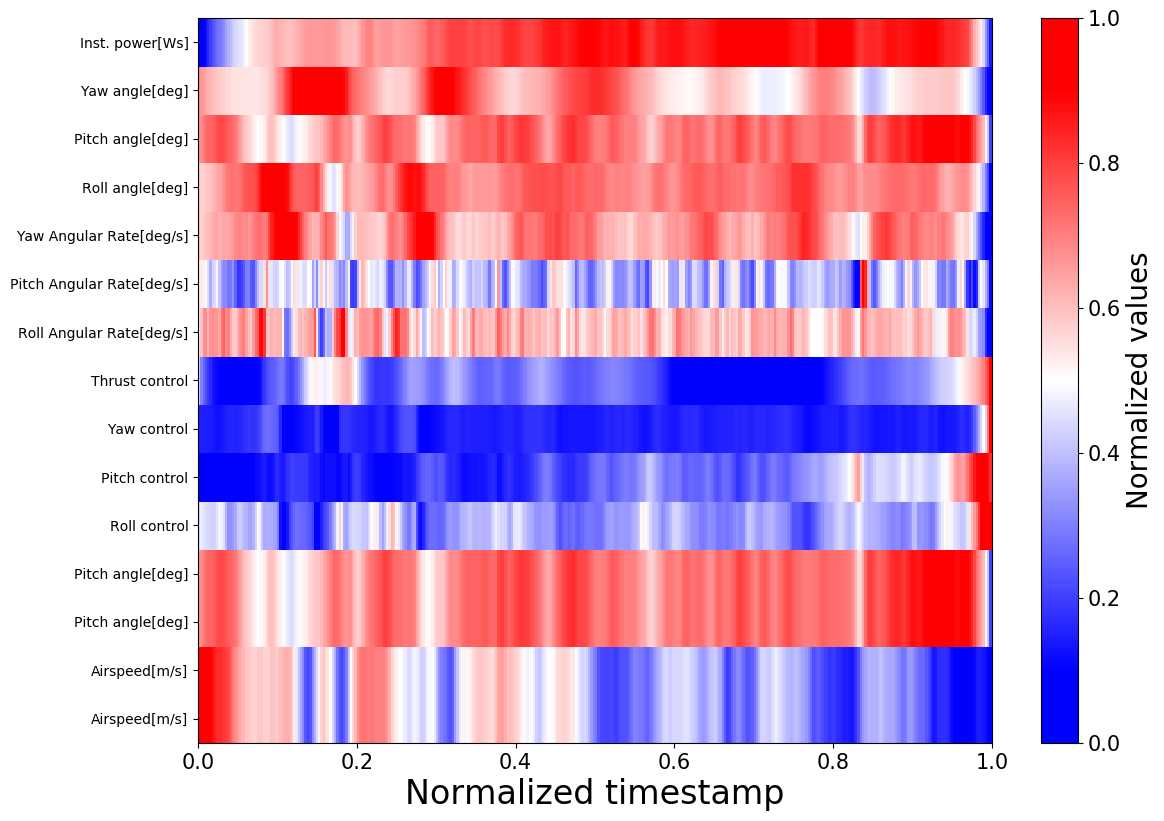

In [11]:
#csvデータ読み込んでデータフレームへ
csvname="./csv/flightdata-20181215-1046-OFF-1.csv"
df = pd.read_csv(csvname)
df = ((df - df.min()) / (df.max() - df.min())) #読み込んだデータフレームの各列を0-1で正規化する


#メッシュプロットに必要なデータフレームを作成していく
meshdf = pd.DataFrame() #空のデータフレーム作成。ここにデータを追加していく
meshdf["time"] = df["timestamp"] #インデックスになる列を暫定的に追加

#2次元プロットにするため、暫定的に列名を数値で表す必要があり、そのように設定する
collist=["Airspeed[m/s]",
         "Airspeed[m/s]",
         "Pitch angle[deg]",
         "Pitch angle[deg]",
         "Roll control",
         "Pitch control",
         "Yaw control",
         "Thrust control",
         "Roll Angular Rate[deg/s]",
         "Pitch Angular Rate[deg/s]",
         "Yaw Angular Rate[deg/s]",
         "Roll angle[deg]",
         "Pitch angle[deg]",
         "Yaw angle[deg]",
         "Inst. power[Ws]"
         ] #使用する列をリストにする。最初の2つは2列分で作りたいから

colinit=0.0
colstep=1.0
colnum=colinit
for col in collist:
    meshdf[colnum] = df[col]
    colnum+=colstep #列に入れたらcolnumを1増やす
meshdf[colnum] = df[collist[-1]] #最後の行は2行必要。ないとプロットされない
   
#最後にtime列をindexに設定して、いらない列を落とす
meshdf.index = meshdf.time #インデックスを変更。最後にやらないとindexが変わって列のコピーできない。       
meshdf.drop(columns=['time'], inplace=True)#いらなくなったtimeを消す


#結果を出力するディレクトリの生成
dirname="plots"
os.makedirs(f"./{dirname}", exist_ok=True)

#プロット用のインスタンス。常に「プロット準備」「中身の設定」「出力」を一直線に行うので、複数のインスタンスを用意しなくていい
plot=Plots()

plot.figinit() #プロットの初期化。必ず最初に書く
mappable=plot.ax.pcolor(meshdf.index,meshdf.columns,meshdf.T,cmap='bwr') #カラーマップを指定しながらプロット。mappableはおまじないと思おう

plot.ax.set_xlabel("Normalized timestamp", fontsize=24) #X軸の名前設定
plot.ax.set_yticks(np.arange(colinit+colstep/2, colnum, colstep)) #stepの半分から始めることで、それぞれの帯の半分の位置にメモリを配置する
plot.ax.set_yticklabels(collist) #メモリをリストの文字列に置き換える
plot.ax.tick_params(axis='y',labelsize=10) #メモリのフォントサイ
plot.ax.tick_params(axis='x',labelsize=15) #メモリのフォントサイ

#カラーバー設定
pp=plt.colorbar(mappable,ax=plot.ax,orientation="vertical",ticks=np.arange(0,1.1, 0.2)) 
pp.set_clim(0.1,0.9) #カラーマップの最大値と最小値に対応する値を設定
pp.set_label("Normalized values" ,fontsize=20) #カラーバーのラベル設定
pp.ax.tick_params(labelsize=15) #カラーバーのメモリフォントサイズ

plot.figout(f"{dirname}/mesh.png") #プロットの出力。

## 散布プロット

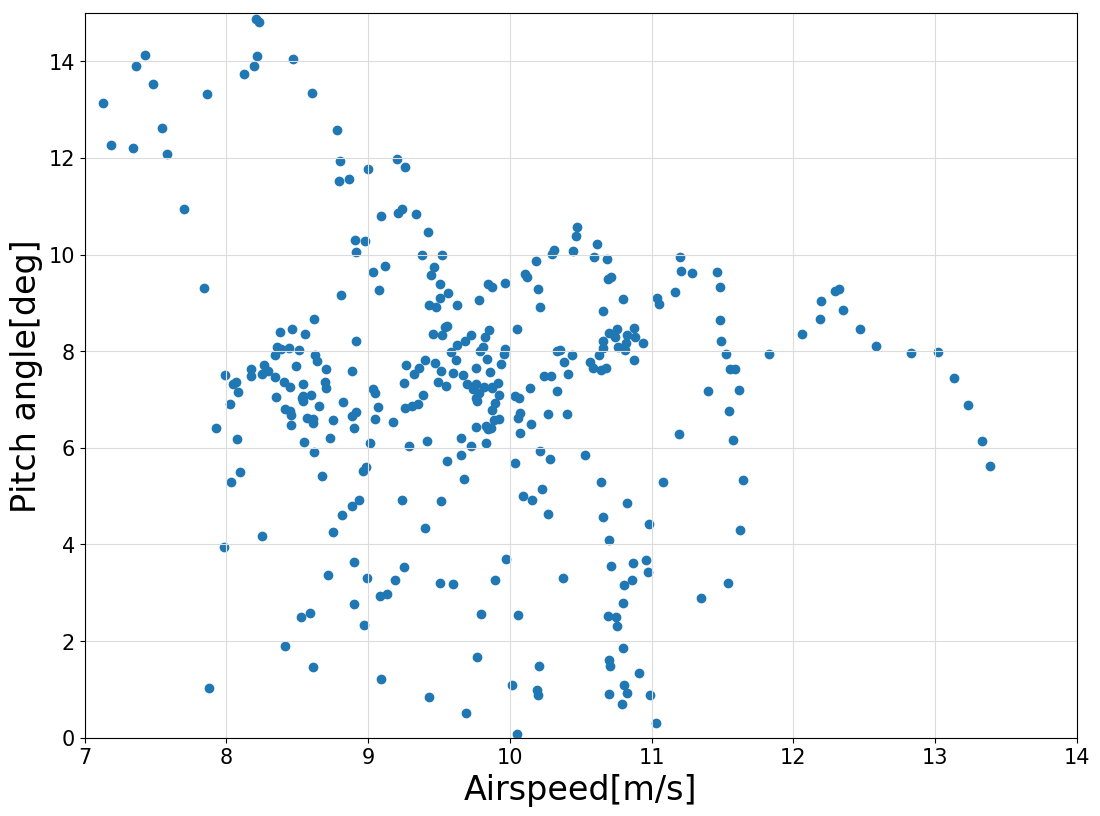

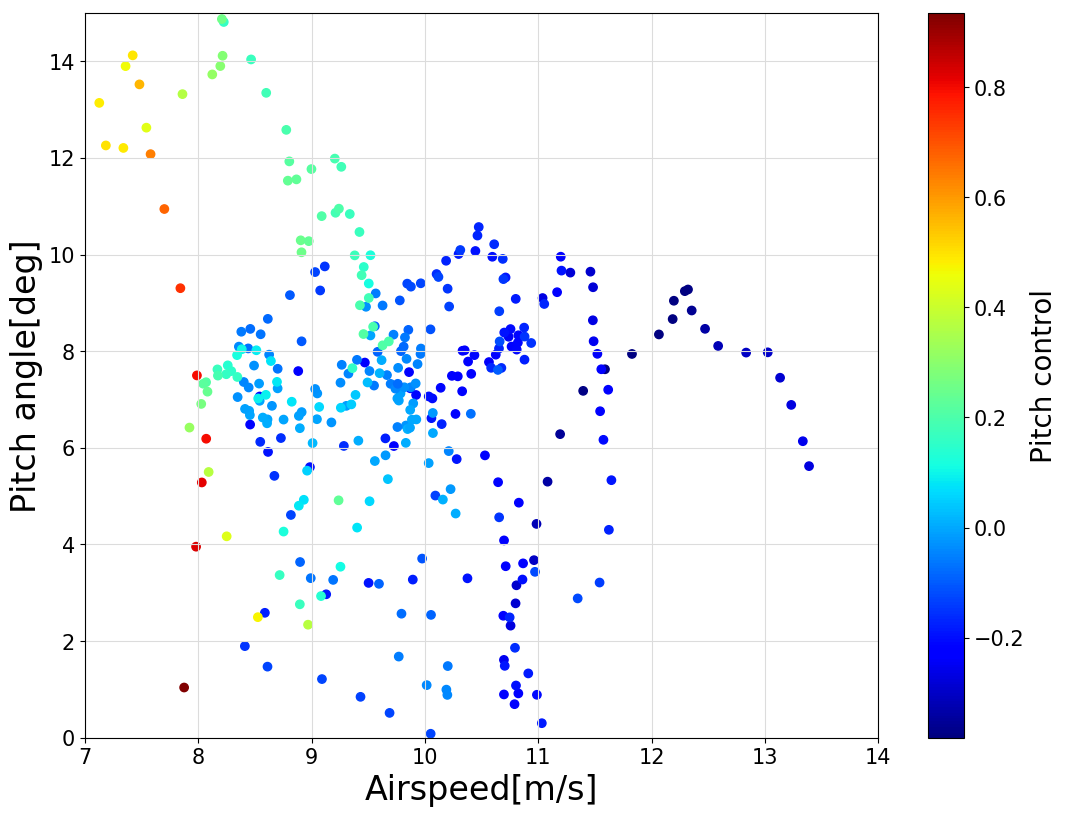

In [12]:
#csvデータ読み込んでデータフレームへ
csvname="./csv/flightdata-20181215-1046-OFF-1.csv"
df = pd.read_csv(csvname)

#結果を出力するディレクトリの生成
dirname="plots"
os.makedirs(f"./{dirname}", exist_ok=True)

#プロット用のインスタンス。常に「プロット準備」「中身の設定」「出力」を一直線に行うので、複数のインスタンスを用意しなくていい
plot=Plots()

#ただの散布図
plot.figinit() #プロットの初期化。必ず最初に書く
plot.ax.scatter("Airspeed[m/s]", "Pitch angle[deg]", data=df) #単色の散布プロット
plot.ax.set_xlabel("Airspeed[m/s]", fontsize=24) #X軸の名前設定
plot.ax.set_ylabel("Pitch angle[deg]", fontsize=24) #X軸の名前設定
plot.ax.grid(color='gainsboro') #X、Y両方のグリッドを色指定しながら表示する。
plot.ax.set_ylim([0,15])   #Y軸の表示する範囲の調整
plot.ax.set_xlim([7,14])   #X軸の表示する範囲の調整
plot.ax.tick_params(labelsize=15) #メモリのフォントサイ

plot.figout(f"{dirname}/scatter1.png") #プロットの出力。
                
#色付きの散布図
plot.figinit() #プロットの初期化。必ず最初に書く
mappable=plot.ax.scatter("Airspeed[m/s]", "Pitch angle[deg]", data=df, c="Pitch control", cmap="jet") #色設定つき散布プロット
plot.ax.set_xlabel("Airspeed[m/s]", fontsize=24) #X軸の名前設定
plot.ax.set_ylabel("Pitch angle[deg]", fontsize=24) #Y軸の名前設定
plot.ax.grid(color='gainsboro') #X、Y両方のグリッドを色指定しながら表示する。
plot.ax.set_ylim([0,15])   #Y軸の表示する範囲の調整
plot.ax.set_xlim([7,14])   #X軸の表示する範囲の調整
plot.ax.tick_params(labelsize=15) #メモリのフォントサイズ
#カラーバー設定
pp=plt.colorbar(mappable,ax=plot.ax,orientation="vertical")#,ticks=np.arange(0,1.1, 0.2)) 
pp.set_label("Pitch control" ,fontsize=20) #カラーバーのラベル設定
pp.ax.tick_params(labelsize=15) #カラーバーのメモリフォントサイズ

plot.figout(f"{dirname}/scatter2.png") #プロットの出力。


# PNG画像の一部切り出し＋サイズを調整＋JPGへ変換
（単独で実行可能）

In [13]:
inpath="./pngorg"
pngdir="smallpng"
jpgdir="smalljpg"

pnglist = os.listdir(inpath) #ディレクトリの中身全てが対象ならlistdirでもOK

#要素１。exist_ok=Trueは既にディレクトリがある場合にエラーを出さないようにする
os.makedirs(f"./{pngdir}", exist_ok=True)
os.makedirs(f"./{jpgdir}", exist_ok=True) 

for path in pnglist:
    #画像変換
    img = Image.open(f'{inpath}/{path}') #要素２。PNG画像を開く
    img = img.crop((161, 166, 954, 839)) #要素３。必要な領域の切り取り
    img = img.resize((800, 30)) #出てきた画像の大きさを変更
    
    #PNG画像出力
    img.save(f'{pngdir}/{path}') #pnglistの中身は「名前.png」なのでそのまま使える
    
    #要素４：JPG画像出力。RGBへの変換が必要らしい
    img = img.convert('RGB') #JPG用にImageモードの変換
    
    filename = os.path.splitext(path)[0] #要素５。0に名前、1に拡張子が格納されるので、0を使う
    img.save(f'{jpgdir}/{filename}.jpg')    




# 平均画像を作成
(単独で実行可能)

In [14]:
indir="./pngorg"
outdir="./png_average"

os.makedirs(f"./{outdir}", exist_ok=True)

modelist=["ON","OFF"]
for mode in modelist: #要素１ 要素文字列はmodeに入っている
    print(f"平均画像:{mode}")
    imlist = glob.glob(f"{indir}/*{mode}.png") #対象になる画像のリスト作成
    
    #要素２：画像を１回配列にして全部足し算して、画像枚数で割り算する
    w,h=Image.open(f"{imlist[0]}").size #画像リストの最初の画像で画像の大きさを取得
    N=len(imlist) #画像リストの大きさで画像枚数を取得
    print(F"横：{w},縦：{h},枚数：{N}")
    
    arr=np.zeros((h,w,4),np.float) #PNG画像の大きさに合わせた配列。ここに入れていく。RGBAなので4色分の大きさが必要
    for im in imlist: #画像ループ
        imname=(f"{im}") #開いて
        imarr=np.array(Image.open(imname),dtype=np.float) #要素2.A：配列の形状に変換して
        arr=arr+imarr/N #画像枚数で割った大きさで足し込む
    arr=np.array(np.round(arr),dtype=np.uint8) #要素2.B：画像配列は整数なのでroundで丸める
    
    #画像出力
    out=Image.fromarray(arr,mode="RGBA") #要素2.C：配列を、PNG用にRGBAモードで、画像フォーマットに変換
    out.save(f"{outdir}/Average-{mode}.png")

平均画像:ON
横：1280,縦：960,枚数：8
平均画像:OFF
横：1280,縦：960,枚数：8


# 副産物をまとめて消す！
単独で実行可能

https://note.nkmk.me/python-os-remove-rmdir-removedirs-shutil-rmtree/  
https://docs.python.org/ja/3/library/shutil.html

In [15]:
import shutil
shutil.rmtree('./smallpng', ignore_errors=True)
shutil.rmtree('./smalljpg', ignore_errors=True)
shutil.rmtree('./png_average', ignore_errors=True)
shutil.rmtree('./plots', ignore_errors=True)